In [1]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale

In [4]:
base_data = pd.read_csv("weatherYerevan_2014-2019.csv")
print(base_data.head(1))
print(base_data.tail(1))

           dt                         dt_iso    temp  temp_min  temp_max  \
0  1388534400  2014-01-01 00:00:00 +0000 UTC  263.15    263.15    263.15   

   pressure  humidity  wind_speed  wind_deg  clouds_all  weather_id  \
0      1027        78           0         0          75         803   

  weather_main weather_description weather_icon  
0       Clouds       broken clouds            4  
               dt                         dt_iso    temp  temp_min  temp_max  \
36243  1554940800  2019-04-11 00:00:00 +0000 UTC  281.15    281.15    281.15   

       pressure  humidity  wind_speed  wind_deg  clouds_all  weather_id  \
36243      1014        87           0         0          20         801   

      weather_main weather_description weather_icon  
36243       Clouds          few clouds          02n  


In [3]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36244 entries, 0 to 36243
Data columns (total 14 columns):
dt                     36244 non-null int64
dt_iso                 36244 non-null object
temp                   36244 non-null float64
temp_min               36244 non-null float64
temp_max               36244 non-null float64
pressure               36244 non-null int64
humidity               36244 non-null int64
wind_speed             36244 non-null int64
wind_deg               36244 non-null int64
clouds_all             36244 non-null int64
weather_id             36244 non-null int64
weather_main           36244 non-null object
weather_description    36244 non-null object
weather_icon           36244 non-null object
dtypes: float64(3), int64(7), object(4)
memory usage: 3.9+ MB


In [5]:
base_data.describe()

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id
count,3.624400e+04,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000
mean,1.485238e+09,286.006331,285.958383,286.064917,1006.079544,58.194791,1.627166,109.299774,33.062521,756.196667
std,4.577716e+07,12.280769,12.260830,12.306040,35.938578,25.031725,1.896116,110.881531,32.252973,109.644919
min,1.388534e+09,248.939000,248.939000,248.939000,863.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,1.456519e+09,276.150000,276.150000,276.150000,1010.000000,36.000000,0.000000,0.000000,0.000000,800.000000
50%,1.490168e+09,286.150000,286.150000,286.150000,1015.000000,59.000000,1.000000,64.000000,20.000000,800.000000
75%,1.522642e+09,296.020000,295.930000,296.150000,1020.000000,81.000000,2.000000,190.000000,75.000000,802.000000
max,1.554941e+09,315.150000,315.150000,315.150000,1039.000000,100.000000,20.000000,360.000000,100.000000,804.000000


We have data for Yerevan weather for 01/01/2014 - 11/04/2019 hourly.  
Dataset contains 14 columns for 36243 observations.  
- **dt** is date time information
- **dt_iso** is same date time information in ISO format, so we can drop first column and set as index this one
- we need to explore remaining variables to understand if we should keep or drop them.

In [7]:
base_data.dt_iso = pd.to_datetime(base_data.dt_iso, 
                             format="%Y-%m-%d %H:%M:%S +0000 UTC")
base_data.set_index(["dt_iso"], inplace=True)
base_data.drop(["dt"], axis=1, inplace=True)

In [8]:
base_data.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,
2014-01-01 00:00:00,263.15,263.15,263.15,1027,78,0,0,75,803,Clouds,broken clouds,4
2014-01-01 01:00:00,263.15,263.15,263.15,1027,78,0,176,75,701,Mist,mist,50n
2014-01-01 02:00:00,263.15,263.15,263.15,1027,78,1,0,75,701,Mist,mist,50n
2014-01-01 03:00:00,263.15,263.15,263.15,1027,85,2,0,75,701,Mist,mist,50n
2014-01-01 04:00:00,262.15,262.15,262.15,1028,85,2,0,75,701,Mist,mist,50d


Let's check if there are numeric columns which $Var[x] = 0$, or categorical variables which have unique values.  

In [9]:
for col in base_data.columns:
    
    if base_data[col].dtype in ["float64", "int64"]:
        
        print(col, base_data[col].dtype, "--", round(base_data[col].var(), 2))
        
    elif base_data[col].dtype == "object":
        
        print(col, base_data[col].dtype, "--", base_data[col].nunique())
        
    else:
        
        print(base_data[col].dtype)

temp float64 -- 150.82
temp_min float64 -- 150.33
temp_max float64 -- 151.44
pressure int64 -- 1291.58
humidity int64 -- 626.59
wind_speed int64 -- 3.6
wind_deg int64 -- 12294.71
clouds_all int64 -- 1040.25
weather_id int64 -- 12022.01
weather_main object -- 11
weather_description object -- 27
weather_icon object -- 21


There are no variables with zero variances or 1 category.  
We can also see that **temp**, **temp_min**, **temp_max** don't have the same variance, however they are very close.  

<Figure size 720x432 with 0 Axes>

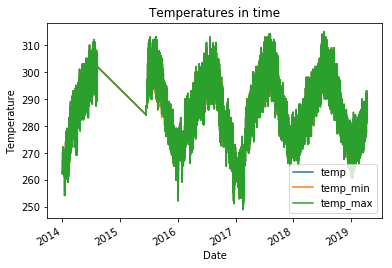

In [12]:
plt.figure(figsize=(10,6))  
base_data.plot(y = ["temp", "temp_min", "temp_max"], sharex=True)
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperatures in time")
plt.savefig("fig1.png")

In [13]:
base_data["2014-08-09":"2015-06-20"]

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,
2015-06-12 01:00:00,284.354,284.354,284.354,868,90,1,28,0,800,Clear,Sky is Clear,01n
2015-06-12 23:00:00,283.993,283.993,283.993,870,84,1,351,0,800,Clear,Sky is Clear,01n
2015-06-13 01:00:00,283.993,283.993,283.993,870,84,1,351,0,800,Clear,Sky is Clear,01n
2015-06-13 02:00:00,285.861,285.861,285.861,872,87,1,0,0,800,Clear,Sky is Clear,01d
2015-06-14 02:00:00,287.590,287.590,287.590,871,83,1,15,0,800,Clear,Sky is Clear,01d
2015-06-14 04:00:00,287.590,287.590,287.590,871,83,1,15,0,800,Clear,Sky is Clear,01d
2015-06-15 01:00:00,287.283,287.283,287.283,867,68,1,3,0,800,Clear,Sky is Clear,01n
2015-06-19 23:00:00,287.107,287.107,287.107,866,84,2,31,64,500,Rain,light rain,10n
2015-06-20 23:00:00,286.719,286.719,286.719,866,78,1,2,24,801,Clouds,few clouds,02n


In [14]:
base_data[["temp", "temp_min", "temp_max"]].corr()

,temp,temp_min,temp_max
temp,1.000000,0.999859,0.999812
temp_min,0.999859,1.000000,0.999416
temp_max,0.999812,0.999416,1.000000


As we see form plot there is a gap in time interval for 2014/08/09 - 2015/06/11.  
We also have temperatures in Kelvin.  
The variables **temp**, **temp_min**, **temp_max** are almost the same, so they contain the same information and there is
no need to keep last two for models.  
Data is not hourly distributed for all days, there are days that contain information only for 2, 3, 5 etc. hours,
so we need to upsample for dayly manner.  
Also there are missing days, in order to have data for all days, we should use forward filling method.  

In [15]:
def kelvin_to_celsius(arr):
    
    return arr - 273.15

In [16]:
base_data[["temp", "temp_min", "temp_max"]] = base_data[["temp", "temp_min", "temp_max"]].apply(kelvin_to_celsius)
base_data.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,
2014-01-01 00:00:00,-10.0,-10.0,-10.0,1027,78,0,0,75,803,Clouds,broken clouds,4
2014-01-01 01:00:00,-10.0,-10.0,-10.0,1027,78,0,176,75,701,Mist,mist,50n
2014-01-01 02:00:00,-10.0,-10.0,-10.0,1027,78,1,0,75,701,Mist,mist,50n
2014-01-01 03:00:00,-10.0,-10.0,-10.0,1027,85,2,0,75,701,Mist,mist,50n
2014-01-01 04:00:00,-11.0,-11.0,-11.0,1028,85,2,0,75,701,Mist,mist,50d


In [17]:
data_numeric = base_data.select_dtypes(exclude="object")
data_object = base_data.select_dtypes(include="object")

In [18]:
data_object.groupby(by=[data_object.index]).agg("count").resample("D").count()

,weather_main,weather_description,weather_icon
dt_iso,,,
2014-01-01,24,24,24
2014-01-02,22,22,22
2014-01-03,21,21,21
2014-01-04,23,23,23
2014-01-05,23,23,23
2014-01-06,24,24,24
2014-01-07,21,21,21
2014-01-08,23,23,23
2014-01-09,22,22,22


In [19]:
data_object.groupby(by=["weather_main"]).agg("count")

,weather_description,weather_icon
weather_main,,
Clear,11736,11736
Clouds,16384,16384
Drizzle,3,3
Dust,3,3
Fog,731,731
Haze,11,11
Mist,3933,3933
Rain,2375,2375
Smoke,7,7


In [23]:
print("Snow in 2015: ", data_object["2015"].weather_main.str.contains("Snow").count())
print("Snow in 2016: ", data_object["2016"].weather_main.str.contains("Snow").count())
print("Snow in 2017: ", data_object["2017"].weather_main.str.contains("Snow").count())
print("Snow in 2018: ", data_object["2018"].weather_main.str.contains("Snow").count())
print("Snow in 2019: ", data_object["2019"].weather_main.str.contains("Snow").count())

Snow in 2015:  3623
Snow in 2016:  7972
Snow in 2017:  8923
Snow in 2018:  8821
Snow in 2019:  2435


In [24]:
data_numeric = data_numeric.resample("D").mean()
data_numeric = data_numeric["2015-06-12":]
data_numeric.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id
dt_iso,,,,,,,,,
2015-06-12,11.0235,11.0235,11.0235,869.0,87.0,1.0,189.5,0.0,800.0
2015-06-13,11.7770,11.7770,11.7770,871.0,85.5,1.0,175.5,0.0,800.0
2015-06-14,14.4400,14.4400,14.4400,871.0,83.0,1.0,15.0,0.0,800.0
2015-06-15,14.1330,14.1330,14.1330,867.0,68.0,1.0,3.0,0.0,800.0
2015-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data_object = data_object["2015-06-12":]
data_object = data_object.resample("H").apply(lambda x: x)
#data_object.replace([], np.nan)
data_object.head()

,weather_main,weather_description,weather_icon
dt_iso,,,
2015-06-12 01:00:00,Clear,Sky is Clear,01n
2015-06-12 02:00:00,[],[],[]
2015-06-12 03:00:00,[],[],[]
2015-06-12 04:00:00,[],[],[]
2015-06-12 05:00:00,[],[],[]


In [50]:
data_object["2015-06-12"]['weather_main'].nunique()

TypeError: unhashable type: 'numpy.ndarray'

In [280]:
data_object.tail()

,weather_main,weather_description,weather_icon
dt_iso,,,
2019-04-10 20:00:00,Clouds,few clouds,02n
2019-04-10 21:00:00,Clouds,few clouds,02n
2019-04-10 22:00:00,Clouds,few clouds,02n
2019-04-10 23:00:00,Rain,light rain,10n
2019-04-11 00:00:00,Clouds,few clouds,02n


In [26]:
data_numeric = data_numeric.fillna(axis=0, method="ffill")
data_numeric.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id
dt_iso,,,,,,,,,
2015-06-12,11.0235,11.0235,11.0235,869.0,87.0,1.0,189.5,0.0,800.0
2015-06-13,11.7770,11.7770,11.7770,871.0,85.5,1.0,175.5,0.0,800.0
2015-06-14,14.4400,14.4400,14.4400,871.0,83.0,1.0,15.0,0.0,800.0
2015-06-15,14.1330,14.1330,14.1330,867.0,68.0,1.0,3.0,0.0,800.0
2015-06-16,14.1330,14.1330,14.1330,867.0,68.0,1.0,3.0,0.0,800.0


In [104]:
data_numeric.weather_id.value_counts()

800.000000    107
800.125000     18
800.416667     16
800.375000     14
800.250000     14
801.000000     14
800.583333     13
701.000000     13
801.333333     12
800.750000     12
800.291667     12
800.833333     11
800.500000     11
801.583333      9
800.916667      9
800.458333      9
800.625000      9
801.166667      9
800.541667      8
801.125000      8
800.166667      8
801.458333      7
800.333333      7
801.250000      7
800.708333      7
800.875000      7
800.666667      7
801.666667      6
800.041667      6
800.958333      6
             ... 
700.708333      1
714.769231      1
751.291667      1
683.586207      1
663.230769      1
769.240000      1
792.333333      1
793.937500      1
752.583333      1
715.708333      1
704.076923      1
801.916667      1
726.791667      1
743.416667      1
801.461538      1
727.375000      1
763.750000      1
725.958333      1
789.458333      1
750.375000      1
671.760000      1
726.041667      1
752.125000      1
795.066667      1
668.933333

**weather_id** is actually a categorical variable not numeric.  

In [28]:
print(base_data.weather_main.unique())
print()
print(base_data.weather_description.unique())

['Clouds' 'Mist' 'Clear' 'Fog' 'Snow' 'Rain' 'Thunderstorm' 'Smoke' 'Haze'
 'Dust' 'Drizzle']

['broken clouds' 'mist' 'Sky is Clear' 'fog' 'light snow' 'snow'
 'heavy snow' 'sky is clear' 'scattered clouds' 'overcast clouds'
 'few clouds' 'light rain' 'thunderstorm' 'proximity thunderstorm'
 'light intensity shower rain' 'thunderstorm with heavy rain'
 'thunderstorm with light rain' 'thunderstorm with rain' 'moderate rain'
 'shower rain' 'heavy intensity shower rain' 'smoke' 'haze'
 'light rain and snow' 'dust' 'ragged thunderstorm'
 'light intensity drizzle']


In [30]:
pd.crosstab(index=base_data.weather_description, columns=base_data.weather_main)

weather_main,Clear,Clouds,Drizzle,Dust,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
weather_description,,,,,,,,,,,
Sky is Clear,9317,0,0,0,0,0,0,0,0,0,0
broken clouds,0,4503,0,0,0,0,0,0,0,0,0
dust,0,0,0,3,0,0,0,0,0,0,0
few clouds,0,6508,0,0,0,0,0,0,0,0,0
fog,0,0,0,0,731,0,0,0,0,0,0
haze,0,0,0,0,0,11,0,0,0,0,0
heavy intensity shower rain,0,0,0,0,0,0,0,2,0,0,0
heavy snow,0,0,0,0,0,0,0,0,0,4,0
light intensity drizzle,0,0,3,0,0,0,0,0,0,0,0


From crosstabulation matrix of **weather_main** and **weather_description** variables, we can conclude that there is no need
to keep the latter as most categories in it are the same as in the first one, and the distribution among remaining levels is
very few.  

In [107]:
data_object.weather_icon.value_counts()

01d    4951
02d    4678
01n    4366
02n    3435
50n    2716
04n    2263
04d    2104
03d    2072
50d    1969
03n    1906
4      1243
10n    1118
10d     960
2       814
11n     443
3       288
11d     240
13n     195
13d     183
09n     151
09d     149
Name: weather_icon, dtype: int64

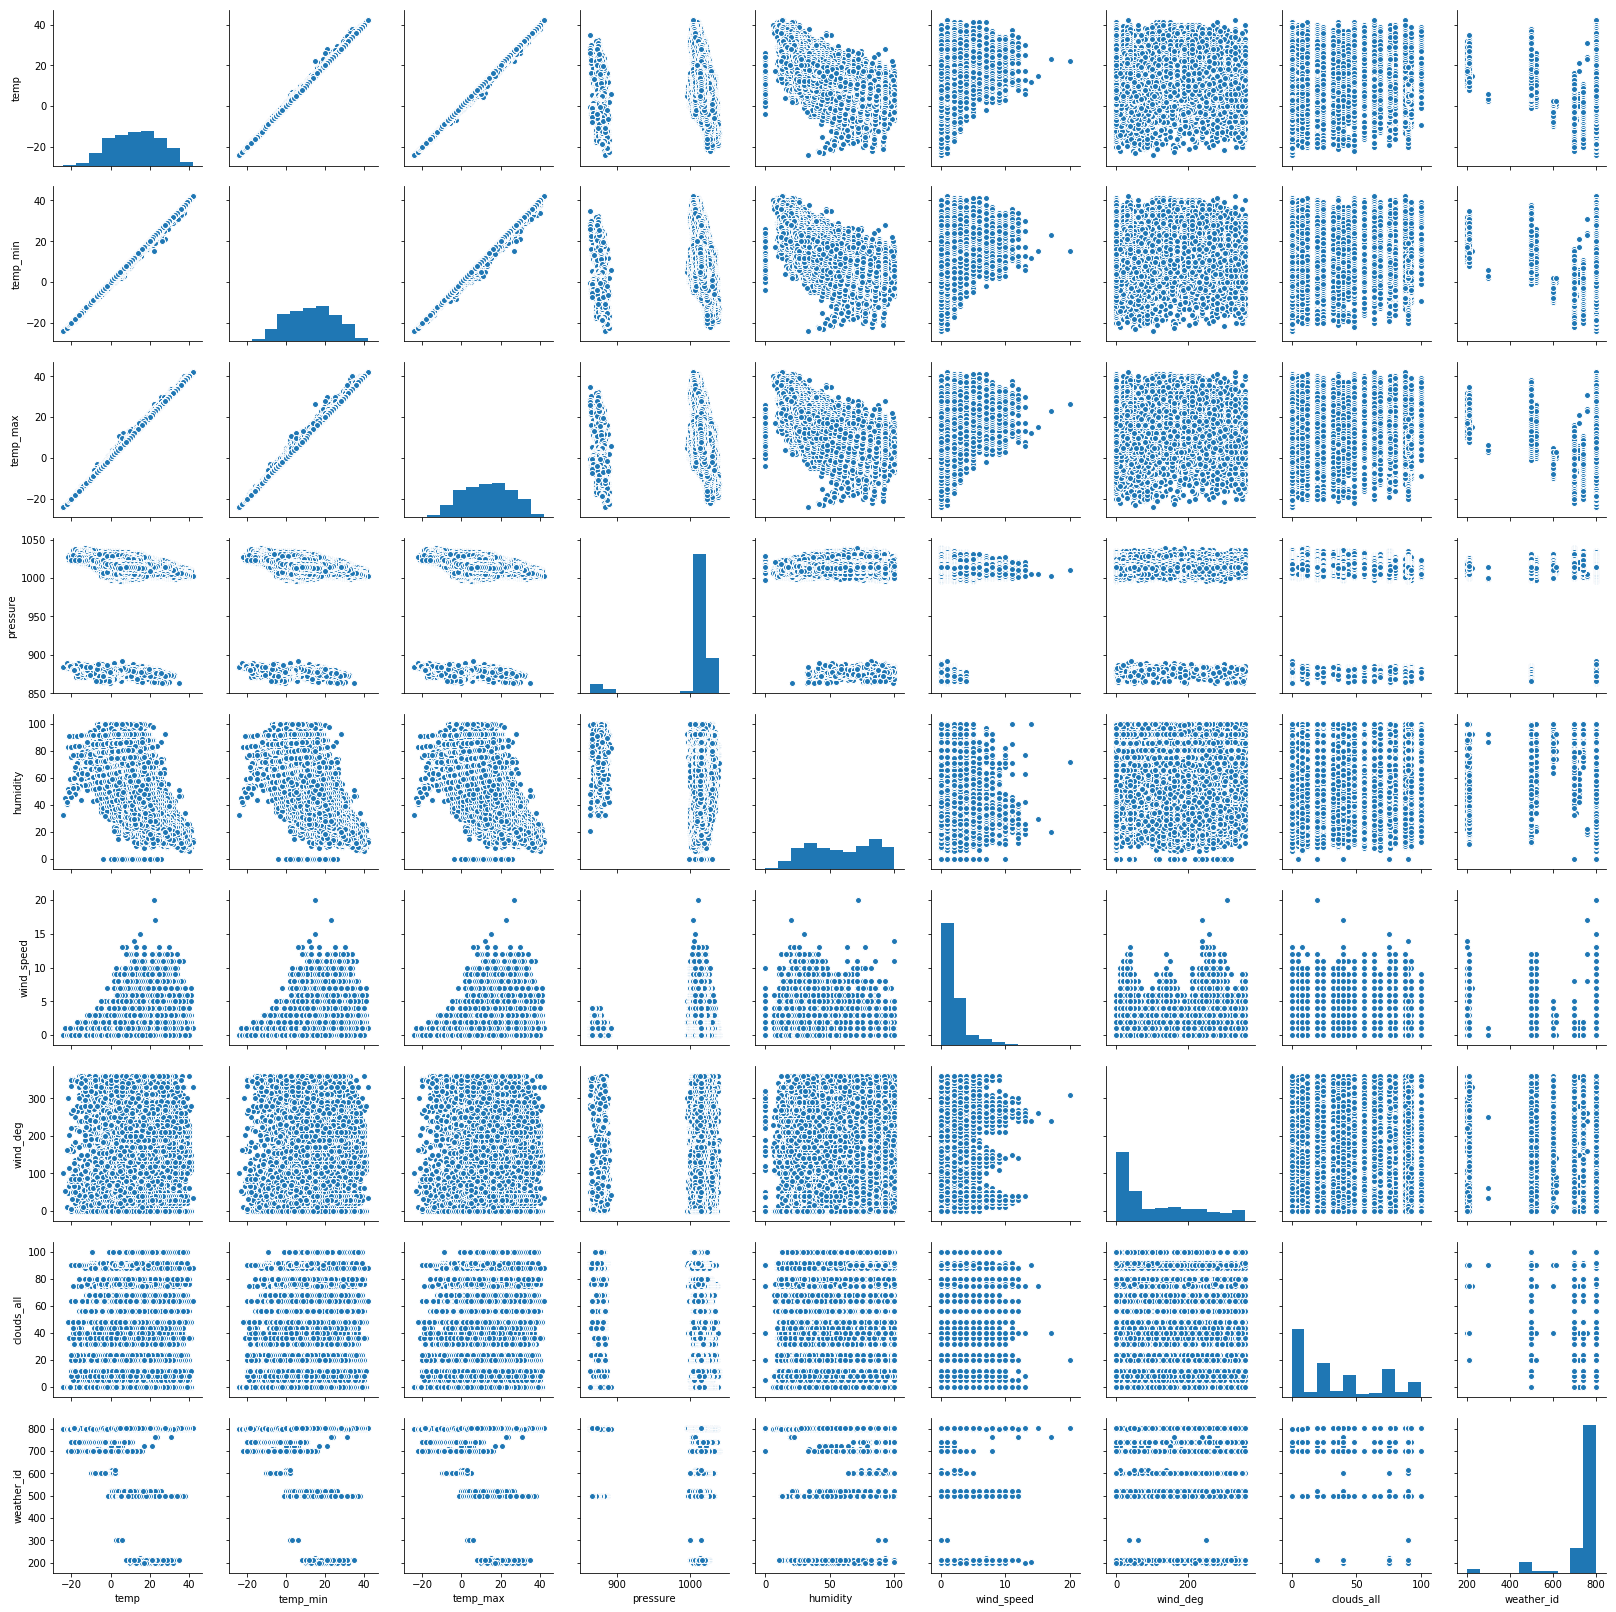

In [18]:
sns.pairplot(data)

In [13]:
data_numeric.drop(["temp_min", "temp_max", "weather_id"], axis=1, inplace=True)
data_object.drop(["weather_description"], axis=1, inplace=True)
#data.weather_id = data.weather_id.apply(lambda x: str(x))

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1400 entries, 2015-06-12 to 2019-04-11
Freq: D
Data columns (total 6 columns):
temp          1400 non-null float64
pressure      1400 non-null float64
humidity      1400 non-null float64
wind_speed    1400 non-null float64
wind_deg      1400 non-null float64
clouds_all    1400 non-null float64
dtypes: float64(6)
memory usage: 76.6 KB


In [132]:
len(pd.get_dummies(data_object).columns)

32

In [70]:
final_data = data_numeric.join(other=pd.get_dummies(data_object),how="left")#.fillna(axis=0, method="ffill")
final_data.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main_Clear,...,weather_icon_10n,weather_icon_11d,weather_icon_11n,weather_icon_13d,weather_icon_13n,weather_icon_2,weather_icon_3,weather_icon_4,weather_icon_50d,weather_icon_50n
dt_iso,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,-10.0,-10.0,-10.0,1027,78,0,0,75,803,0,...,0,0,0,0,0,0,0,1,0,0
2014-01-01 01:00:00,-10.0,-10.0,-10.0,1027,78,0,176,75,701,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 02:00:00,-10.0,-10.0,-10.0,1027,78,1,0,75,701,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 03:00:00,-10.0,-10.0,-10.0,1027,85,2,0,75,701,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 04:00:00,-11.0,-11.0,-11.0,1028,85,2,0,75,701,0,...,0,0,0,0,0,0,0,0,1,0


In [135]:
pd.get_dummies(data_object)

,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Dust,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,...,weather_icon_10n,weather_icon_11d,weather_icon_11n,weather_icon_13d,weather_icon_13n,weather_icon_2,weather_icon_3,weather_icon_4,weather_icon_50d,weather_icon_50n
dt_iso,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2014-01-01 01:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 02:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 03:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2014-01-01 04:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-01 05:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-01 06:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-01 07:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2014-01-01 08:00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
data.weather_main.nunique()

11

In [17]:
data_numeric.head()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
dt_iso,,,,,,
2015-06-12,11.0235,869.0,87.0,1.0,189.5,0.0
2015-06-13,11.7770,871.0,85.5,1.0,175.5,0.0
2015-06-14,14.4400,871.0,83.0,1.0,15.0,0.0
2015-06-15,14.1330,867.0,68.0,1.0,3.0,0.0
2015-06-16,14.1330,867.0,68.0,1.0,3.0,0.0


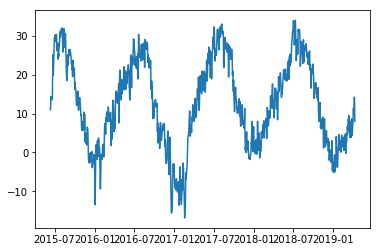

In [21]:
plt.plot(data_numeric["temp"])

In [27]:
scaled_data = scale(data_numeric, with_mean=True, with_std=True)

In [30]:
final_data = pd.DataFrame(scaled_data, columns=data_numeric.columns, index=data_numeric.index)
final_data.head()

,temp,pressure,humidity,wind_speed,wind_deg,clouds_all
dt_iso,,,,,,
2015-06-12,-0.155277,-4.087528,1.454036,-0.550188,1.859588,-1.283032
2015-06-13,-0.088803,-4.027192,1.376120,-0.550188,1.523294,-1.283032
2015-06-14,0.146127,-4.027192,1.246260,-0.550188,-2.332080,-1.283032
2015-06-15,0.119044,-4.147864,0.467100,-0.550188,-2.620332,-1.283032
2015-06-16,0.119044,-4.147864,0.467100,-0.550188,-2.620332,-1.283032


In [31]:
final_data.to_csv("final_data.csv")

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

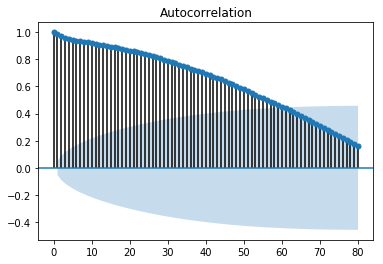

In [33]:
plot_acf(data_numeric["temp"], lags=80)
plt.savefig("fig2.png")

In [37]:
data_numeric.to_csv("data_non_scaled.csv")